   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


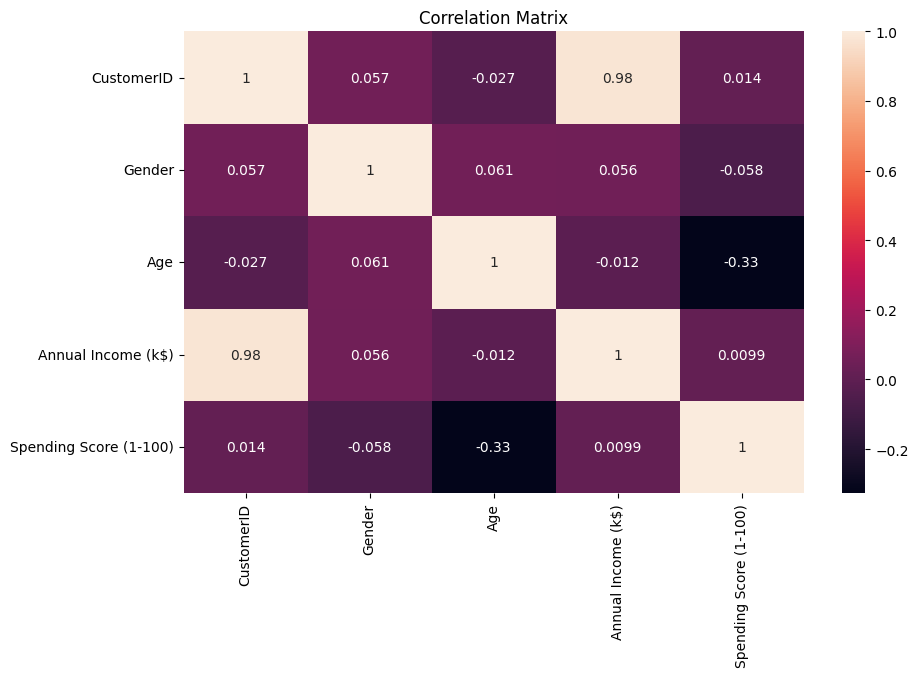

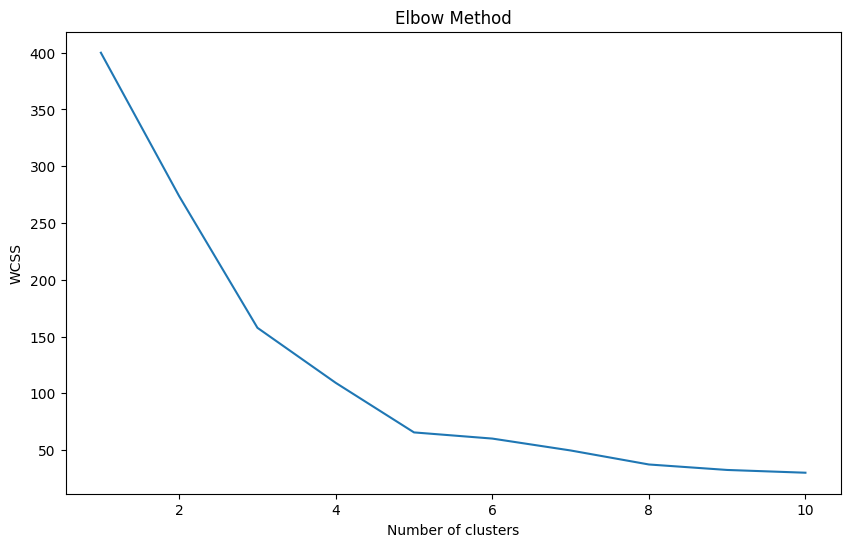

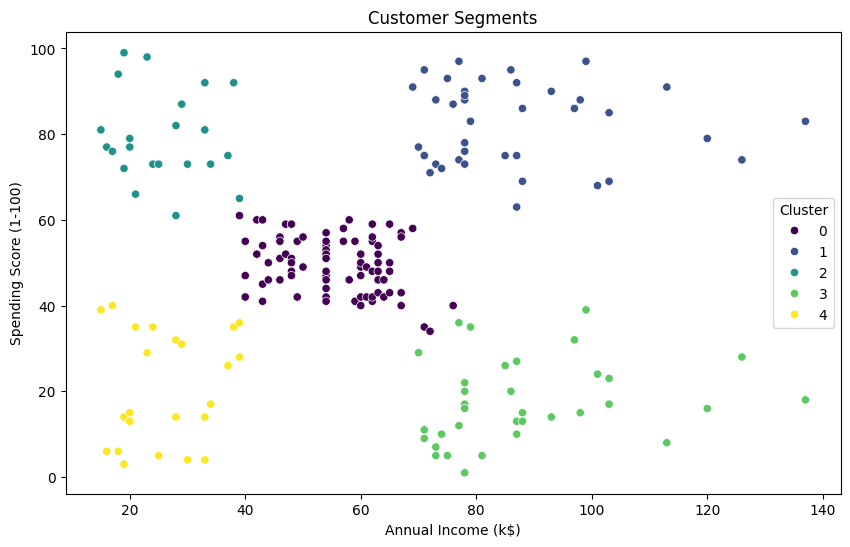

In [5]:
# Customer Segmentation using K-Means Clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Create results directory if it doesn't exist
os.makedirs('../results', exist_ok=True)

# Load data
df = pd.read_csv('/content/Mall_Customers.csv')
df
print(df.head())

# Convert Gender to numeric
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Exploratory Data Analysis
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with optimal clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to dataframe
df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.savefig('../results/clusters_visualization.png', bbox_inches='tight')  # Added bbox_inches
plt.show()

# Save results
df.to_csv('../results/customer_segments.csv', index=False)